In [20]:
import copy
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [21]:
def square_sin(x):
    return math.sin(x**2)

In [22]:
def divided_sin(x):
    if x == 0:
        return 0
    return math.sin(1 / x)

In [23]:
def FFT(array):
    n = array.size
    if n == 1:
        return
    even = np.zeros(n // 2, dtype = complex)
    odd = np.zeros(n // 2, dtype = complex)
    j = 0
    for i in range(0, n - 1, 2):
        even[j] = copy.deepcopy(array[i]);
        odd[j] = copy.deepcopy(array[i + 1]);
        j += 1
        
    FFT(odd)
    FFT(even)
    angle = 2 * math.pi / n
    w = complex(1)
    wn = complex(math.cos(angle), math.sin(angle))
    for i in range(0, n // 2):
        array[i] = even[i] + w * odd[i];
        array[i + n // 2] = even[i] - w * odd[i];
        w *= wn

In [24]:
def FFTReverse(array):
    n = array.size
    if n == 1:
        return 
    even = np.zeros(n // 2, dtype = complex)
    odd = np.zeros(n // 2, dtype = complex)
    j = 0
    for i in range(0, n - 1, 2):
        even[j] = copy.deepcopy(array[i]);
        odd[j] = copy.deepcopy(array[i + 1]);
        j += 1
        
    FFTReverse(odd)
    FFTReverse(even)
    
    angle = -2 * math.pi / n
    w = complex(1)
    wn = complex(math.cos(angle), math.sin(angle))
    
    for i in range(0, n // 2):
        array[i] = (even[i] + w * odd[i]) / 2;
        array[i + n // 2] = (even[i] - w * odd[i]) / 2;
        w *= wn

In [25]:
def minSecondPower(number):
    power = 0;
    while (2**power < number):
        power += 1
    return power

In [26]:
def minNumberToSecondPower(number):
    return 2 ** minSecondPower(number) - number

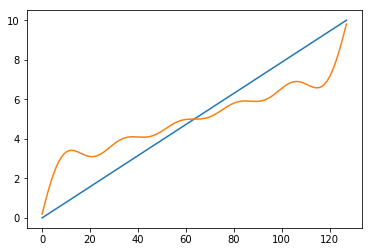

In [79]:
#x
#при удалении хотя бы 5% точек на графике появляется волнистость
#наблюдение. график становится примерно похожим на y = 0.5*x
frequency = 100
min_power = minSecondPower(frequency)
min_number = minNumberToSecondPower(frequency)
function = np.array([x for x in np.linspace(0, 10, 2 ** min_power)], dtype = complex)
plt.plot(np.real(function));
part = 5
FFT(function);
for i in range(function.size - 1, function.size - function.size * part // 100, -1):
    function[i] = 0
FFTReverse(function);
plt.plot(np.real(function));

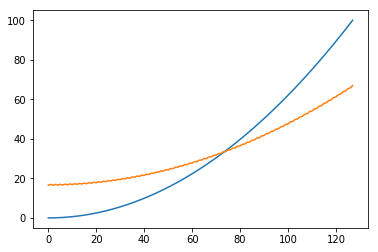

In [87]:
#x^2
#при удалении хотя бы 2% точек на графике появляется волнистость
#наблюдение. график становится примерно похожим на y = (0.5*x) ^ 2
frequency = 100
min_power = minSecondPower(frequency)
min_number = minNumberToSecondPower(frequency)
function = np.array([x**2 for x in np.linspace(0, 10, 2 ** min_power)], dtype = complex)
plt.plot(np.real(function));
part = 50
FFT(function);
for i in range(function.size - 1, function.size - function.size * part // 100, -1):
    function[i] = 0
FFTReverse(function);
plt.plot(np.real(function));

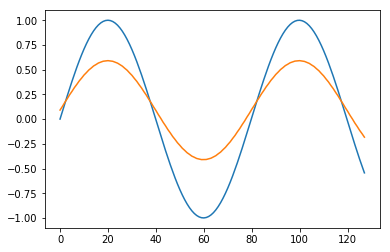

In [48]:
#синус. 
#при удалении от 3% до 40% точек или от 80% до 99% появляется "волнистость" и амплитуда уменьшается примерно в 2 раза.
#при удалении от 40% до 80% просто уменьшается амплитуда.
#при удалении от 1% до 3% график смещается
frequency = 100
min_power = minSecondPower(frequency)
min_number = minNumberToSecondPower(frequency)
function = np.array([math.sin(x) for x in np.linspace(0, 10, 2 ** min_power)], dtype = complex)
plt.plot(np.real(function));
part = 50
FFT(function);
for i in range(function.size - 1, function.size - function.size * part // 100, -1):
    function[i] = 0
FFTReverse(function);
plt.plot(np.real(function));

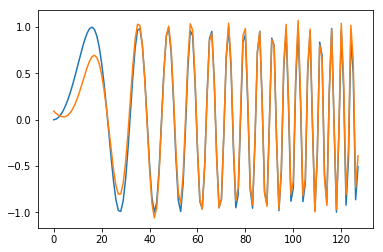

In [94]:
#синус от квадрата аргумента. аномалии при 5% убранных точек
frequency = 100
min_power = minSecondPower(frequency)
min_number = minNumberToSecondPower(frequency)
function = np.array([square_sin(x) for x in np.linspace(0, 10, 2 ** min_power)], dtype = complex)
plt.plot(np.real(function));
part = 5
FFT(function);
for i in range(function.size - 1, function.size - function.size * part // 100, -1):
    function[i] = 0
FFTReverse(function);
plt.plot(np.real(function));

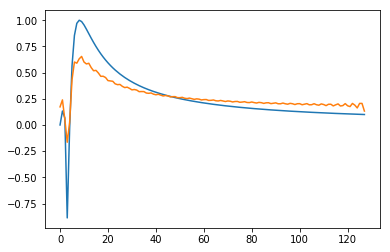

In [95]:
#синус 1/x
#при частоте дискретизации 100 плохо прослеживается график самой функции в области нуля
#при удалении от 2% точек появляются аномалии в виде уменьшения амплитуды и появления волнистости
frequency = 100
min_power = minSecondPower(frequency)
min_number = minNumberToSecondPower(frequency)
function = np.array([divided_sin(x) for x in np.linspace(0, 10, 2 ** min_power)], dtype = complex)
plt.plot(np.real(function));
part = 70
FFT(function);
for i in range(function.size - 1, function.size - function.size * part // 100, -1):
    function[i] = 0
FFTReverse(function);
plt.plot(np.real(function));